In [2]:
import sklearn

In [15]:
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

In [9]:
# Creating dataset
iris = load_iris()
X=iris['data']
y=iris['target']
X_train,y_train=iris.data[:,1:3],iris.target # Taking the entire data set for model traning

In [174]:
# Defining base learners
base=[('clf1',RandomForestClassifier(n_estimators=3, random_state=42)),
      ('clf2',KNeighborsClassifier(n_neighbors=3)),
      ('clf3',GaussianNB())]
# Defining meta model
meta_model=LogisticRegression()
# Creating the stacking classifier
stacking_model=StackingClassifier(estimators=base, final_estimator=meta_model)
# Performing 3 fold cross validation
for clf,name in zip ([clf1,clf2,clf3,stacking_model],
                     ["RandomForestClassifier",\
                      "KNeighborsClassifier",\
                      "GaussianNB",\
                      "stacking_model"]):
  accuracy = model_selection.cross_val_score(clf,X_train,y_train,cv=3,scoring="accuracy")
  #print(round(accuracy.mean(),3)*100)
  print(f"Accuracy of {name}: {round(accuracy.mean(),3)*100}")


Accuracy of RandomForestClassifier: 90.0
Accuracy of KNeighborsClassifier: 95.3
Accuracy of GaussianNB: 91.3
Accuracy of stacking_model: 94.0


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

Text(0.5, 1.0, 'Unrolling the data')

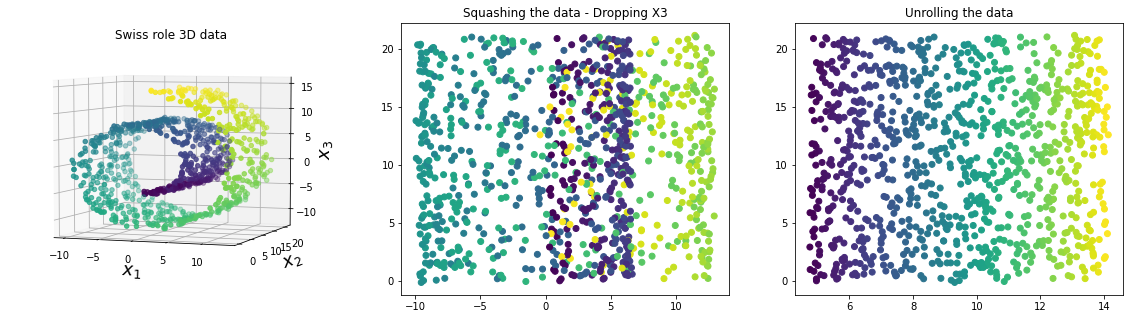

In [116]:
# Manifold 
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
axes = [-11,14,-2,24,-12,15]
fig=plt.figure(figsize=(20, 5))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=t,cmap="viridis")
ax.view_init(5, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_title("Swiss role 3D data")
# Dropping X3 (Squashes the data)
ax = fig.add_subplot(132)
ax.scatter(X[:,0],X[:,1],c=t,cmap="viridis")
ax.set_title("Squashing the data - Dropping X3")

ax = fig.add_subplot(133)
ax.scatter(t,X[:,1],c=t,cmap="viridis")
ax.set_title("Unrolling the data")

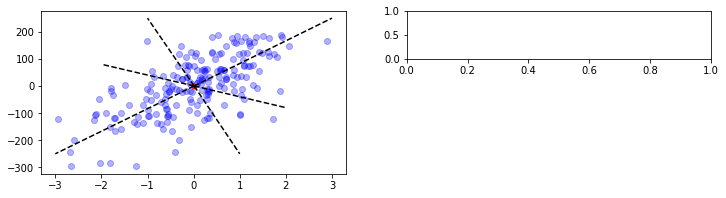

In [172]:
# PCA best projections
from sklearn.datasets import make_regression
x,y = make_regression(n_samples =100,n_features=2,n_targets=1,noise=0.1)
plt.figure(figsize=(12,3))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot(x,y,"bo",alpha=0.3)
plt.plot(np.mean(x),"r.",ms=10)
plt.plot([np.mean(x),3],[0,250],"k--",ms=10)
plt.plot([np.mean(x),-3],[0,-250],"k--",ms=10)
plt.plot([np.mean(x),1],[0,-250],"k--",ms=10)
plt.plot([np.mean(x),-1],[0,250],"k--",ms=10)
plt.plot([np.mean(x),2],[0,-80],"k--",ms=10)
plt.plot([np.mean(x),-2],[0,80],"k--",ms=10)

plt.subplot2grid((3,2), (0, 1))
plt.plot([np.mean(x),3],[0,250],"k--",ms=10)